In [21]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [22]:
df = pd.read_csv('Movie_Dataset_Updated.csv')
df

,Title,Year,Age,IMDb,Rotten.Tomatoes,Netflix,Hulu,Prime.Video,Disney.,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,Action,United States,English,148
1,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,Action,United States,Japanese,148
2,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,Action,United States,French,148
3,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,Action,United Kingdom,English,148
4,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,Action,United Kingdom,Japanese,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79964,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,Bruce Bilson,Fantasy,United States,English,120
79965,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,Bruce Bilson,Horror,United States,English,120
79966,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,Neal Israel,Comedy,United States,English,90
79967,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,Neal Israel,Family,United States,English,90


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79969 entries, 0 to 79968
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            79969 non-null  object 
 1   Year             79969 non-null  int64  
 2   Age              43912 non-null  object 
 3   IMDb             79969 non-null  float64
 4   Rotten.Tomatoes  37500 non-null  float64
 5   Netflix          79969 non-null  int64  
 6   Hulu             79969 non-null  int64  
 7   Prime.Video      79969 non-null  int64  
 8   Disney.          79969 non-null  int64  
 9   Directors        78887 non-null  object 
 10  Genres           79936 non-null  object 
 11  Country          79743 non-null  object 
 12  Language         79360 non-null  object 
 13  Runtime          79969 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 8.5+ MB


In [24]:
df['Age'].fillna('Null', inplace=True)
df["Rotten.Tomatoes"].fillna('Null', inplace = True)
df["Directors"].fillna('Null', inplace = True)
df["Genres"].fillna('Null', inplace = True)
df["Country"].fillna('Null', inplace = True)
df["Language"].fillna('Null', inplace = True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79969 entries, 0 to 79968
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            79969 non-null  object 
 1   Year             79969 non-null  int64  
 2   Age              79969 non-null  object 
 3   IMDb             79969 non-null  float64
 4   Rotten.Tomatoes  79969 non-null  object 
 5   Netflix          79969 non-null  int64  
 6   Hulu             79969 non-null  int64  
 7   Prime.Video      79969 non-null  int64  
 8   Disney.          79969 non-null  int64  
 9   Directors        79969 non-null  object 
 10  Genres           79969 non-null  object 
 11  Country          79969 non-null  object 
 12  Language         79969 non-null  object 
 13  Runtime          79969 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 8.5+ MB


In [26]:
# Define a custom function to map ages to bins
def map_age_to_bin(age):
    if age == "7+":
        return "Children"
    elif age == "13+":
        return "Teens"
    elif age == "18+":
        return "Adults"
    elif age == "all":
        return "All Ages"
    else:
        return "Null"

In [27]:
df['Age Bin'] = df['Age'].apply(map_age_to_bin)
df

,Title,Year,Age,IMDb,Rotten.Tomatoes,Netflix,Hulu,Prime.Video,Disney.,Directors,Genres,Country,Language,Runtime,Age Bin
0,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,Action,United States,English,148,Teens
1,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,Action,United States,Japanese,148,Teens
2,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,Action,United States,French,148,Teens
3,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,Action,United Kingdom,English,148,Teens
4,Inception,2010,13+,8.8,0.87,1,0,0,0,Christopher Nolan,Action,United Kingdom,Japanese,148,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79964,The Ghosts of Buxley Hall,1980,Null,6.2,Null,0,0,0,1,Bruce Bilson,Fantasy,United States,English,120,Null
79965,The Ghosts of Buxley Hall,1980,Null,6.2,Null,0,0,0,1,Bruce Bilson,Horror,United States,English,120,Null
79966,The Poof Point,2001,7+,4.7,Null,0,0,0,1,Neal Israel,Comedy,United States,English,90,Children
79967,The Poof Point,2001,7+,4.7,Null,0,0,0,1,Neal Israel,Family,United States,English,90,Children


In [28]:
#df.to_excel('New_Movie_Dataset_Updated.xlsx',sheet_name='New_Movie_Dataset_Updated',index=False)

In [29]:
df2 = df[["Title", "Year", "Age Bin", "Netflix", "Hulu", "Prime.Video", "Disney."]].copy()
df2

,Title,Year,Age Bin,Netflix,Hulu,Prime.Video,Disney.
0,Inception,2010,Teens,1,0,0,0
1,Inception,2010,Teens,1,0,0,0
2,Inception,2010,Teens,1,0,0,0
3,Inception,2010,Teens,1,0,0,0
4,Inception,2010,Teens,1,0,0,0
...,...,...,...,...,...,...,...
79964,The Ghosts of Buxley Hall,1980,Null,0,0,0,1
79965,The Ghosts of Buxley Hall,1980,Null,0,0,0,1
79966,The Poof Point,2001,Children,0,0,0,1
79967,The Poof Point,2001,Children,0,0,0,1


In [30]:
df2 = df2.drop_duplicates(keep=False)

In [31]:
df2

,Title,Year,Age Bin,Netflix,Hulu,Prime.Video,Disney.
610,Moonlight,2016,Adults,1,0,0,0
662,What's Eating Gilbert Grape,1993,Teens,1,0,1,0
803,The Evil Dead,1981,Adults,1,0,0,0
839,Y Tu Mamá También,2001,Adults,1,0,0,0
842,Mud,2013,Teens,1,0,0,0
...,...,...,...,...,...,...,...
79928,Drain Alcatraz,2017,Null,0,0,0,1
79936,Hacksaw,1971,Children,0,0,0,1
79950,Drain The Sunken Pirate City,2017,Null,0,0,0,1
79951,Bizarre Dinosaurs,2010,Null,0,0,0,1


In [32]:
df2 = df2.reset_index()
df2

,index,Title,Year,Age Bin,Netflix,Hulu,Prime.Video,Disney.
0,610,Moonlight,2016,Adults,1,0,0,0
1,662,What's Eating Gilbert Grape,1993,Teens,1,0,1,0
2,803,The Evil Dead,1981,Adults,1,0,0,0
3,839,Y Tu Mamá También,2001,Adults,1,0,0,0
4,842,Mud,2013,Teens,1,0,0,0
...,...,...,...,...,...,...,...,...
3378,79928,Drain Alcatraz,2017,Null,0,0,0,1
3379,79936,Hacksaw,1971,Children,0,0,0,1
3380,79950,Drain The Sunken Pirate City,2017,Null,0,0,0,1
3381,79951,Bizarre Dinosaurs,2010,Null,0,0,0,1


In [33]:
df2 = df2.drop(['index'],axis=1)
df2

,Title,Year,Age Bin,Netflix,Hulu,Prime.Video,Disney.
0,Moonlight,2016,Adults,1,0,0,0
1,What's Eating Gilbert Grape,1993,Teens,1,0,1,0
2,The Evil Dead,1981,Adults,1,0,0,0
3,Y Tu Mamá También,2001,Adults,1,0,0,0
4,Mud,2013,Teens,1,0,0,0
...,...,...,...,...,...,...,...
3378,Drain Alcatraz,2017,Null,0,0,0,1
3379,Hacksaw,1971,Children,0,0,0,1
3380,Drain The Sunken Pirate City,2017,Null,0,0,0,1
3381,Bizarre Dinosaurs,2010,Null,0,0,0,1


In [34]:
df3 = df2.drop(df2[df2['Age Bin'] == 'Null'].index)

<Figure size 1440x1080 with 0 Axes>

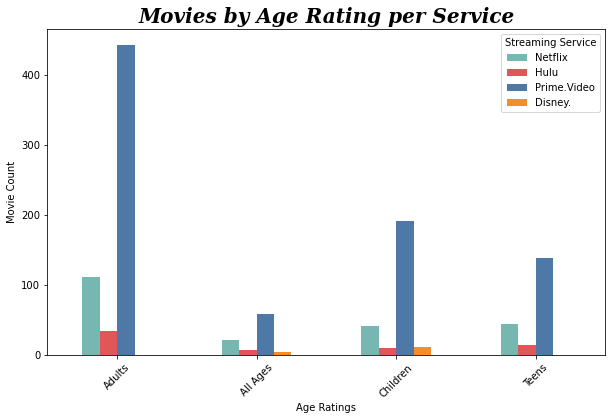

In [46]:
# Define the figure size (width and height) in inches
fig_width = 20  # Change this to your desired width
fig_height = 15  # Change this to your desired height

# Create a figure with the specified size
plt.figure(figsize=(fig_width, fig_height))

colors = ['#76B7B2', '#E15759', '#4E79A7', '#F28E2B']

# Group by 'Age Bin' and sum the streaming service columns
age_bin_counts = df3.groupby('Age Bin')[['Netflix', 'Hulu', 'Prime.Video', 'Disney.']].sum()

# Create a stacked bar chart
ax = age_bin_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors)

# Customize the plot
title_font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'size': 20, 'style': 'italic'}
plt.title('Movies by Age Rating per Service', fontdict=title_font)
plt.xlabel('Age Ratings')
plt.ylabel('Movie Count')
plt.xticks(rotation=45)
ax.legend().set_visible(False)
plt.legend(title='Streaming Service')

# Show the plot
plt.show()